In [64]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
    
    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        n_samples = x.shape[0]

        # X is a matrix of features
        # y is a vector of labels
        self.w = np.zeros(x.shape[1])
        self.b = 0

        for i in range(self.n_iterations):
            y_pred = self.predict(x)
            dw = -2/n_samples * np.dot(x.T, (y - y_pred))
            db = -2/n_samples * np.sum(y - y_pred)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            if i % 10 == 0:
                print(f"Loss: {self.loss(y, y_pred)}")
        
    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self.w) + self.b

    def loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean((y_true - y_pred) ** 2)
    
    def r2_score(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))


# Import Data

In [54]:
from pandas import read_csv
full_dataset = read_csv('adm_data.csv')
full_dataset.columns = full_dataset.columns.str.strip()

# Explore Data

In [55]:
full_dataset.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Split Data


In [56]:
train_data = full_dataset.sample(frac=0.8, random_state=0)
test_data = full_dataset.drop(train_data.index)

# Prepare Data
train_x = train_data.drop('Chance of Admit', axis=1).values
train_y = train_data['Chance of Admit'].values

test_x = test_data.drop('Chance of Admit', axis=1).values
test_y = test_data['Chance of Admit'].values



# Raw Model

In [67]:
# Initialize Model
model = LinearRegression(learning_rate=0.00001, n_iterations=100)

# Train Model
model.fit(train_x, train_y)




Loss: 0.54073375
Loss: 1351194.7197895814
Loss: 3549891427158.794
Loss: 9.326360658110067e+18
Loss: 2.4502440401327966e+25
Loss: 6.437340433522237e+31
Loss: 1.6912336558449268e+38
Loss: 4.443249985301117e+44
Loss: 1.1673413879654125e+51
Loss: 3.0668675419230744e+57


In [62]:
# Make Predictions
predictions = model.predict(test_x)
print(model.r2_score(test_y, predictions))

nan


# Data Preparation then Model

In [ ]:
# Things to keep in mind for linear regression:

# Assumes homoscedasticity (constant variance of errors across all predictor values)
# Simple Solution: 
# - Transform response variable with log transform if variance increases with mean
# - Check residual plots to verify improvement

# Assumes independence of errors (no autocorrelation)
# Simple Solution: 
# - Randomize data order if possible
# - Plot residuals vs. order to check pattern
# - If time series, acknowledge this limitation

# Assumes normality of errors
# Simple Solution: 
# - Log transform highly skewed variables
# - Remove clear outliers if justified by domain knowledge
# - For toy model: can often proceed if roughly normal

# Assumes linearity of relationship
# Simple Solution: 
# - Create scatter plots of each predictor vs. response
# - Add squared terms for obvious curved relationships
# - Log transform if relationship looks exponential

# Assumes constant variance of errors
# Simple Solution: 
# - Log transform if variance increases with value
# - Remove obvious heteroscedastic predictors
# - Document this limitation if cannot fix

# Assumes no multicollinearity
# Simple Solution: 
# - Calculate correlations between predictors
# - Remove one of each pair of highly correlated features (r > 0.9)
# - Keep predictor that makes more practical sense

# Squares error (sensitive to outliers)
# Simple Solution:
# - Remove clear outliers (beyond 3 standard deviations)
# - Document any removed points
# - Plot residuals to identify extreme points

In [69]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-macosx_10_13_universal2.whl.metadata (165 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 13.4 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 15.5 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.6 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.w

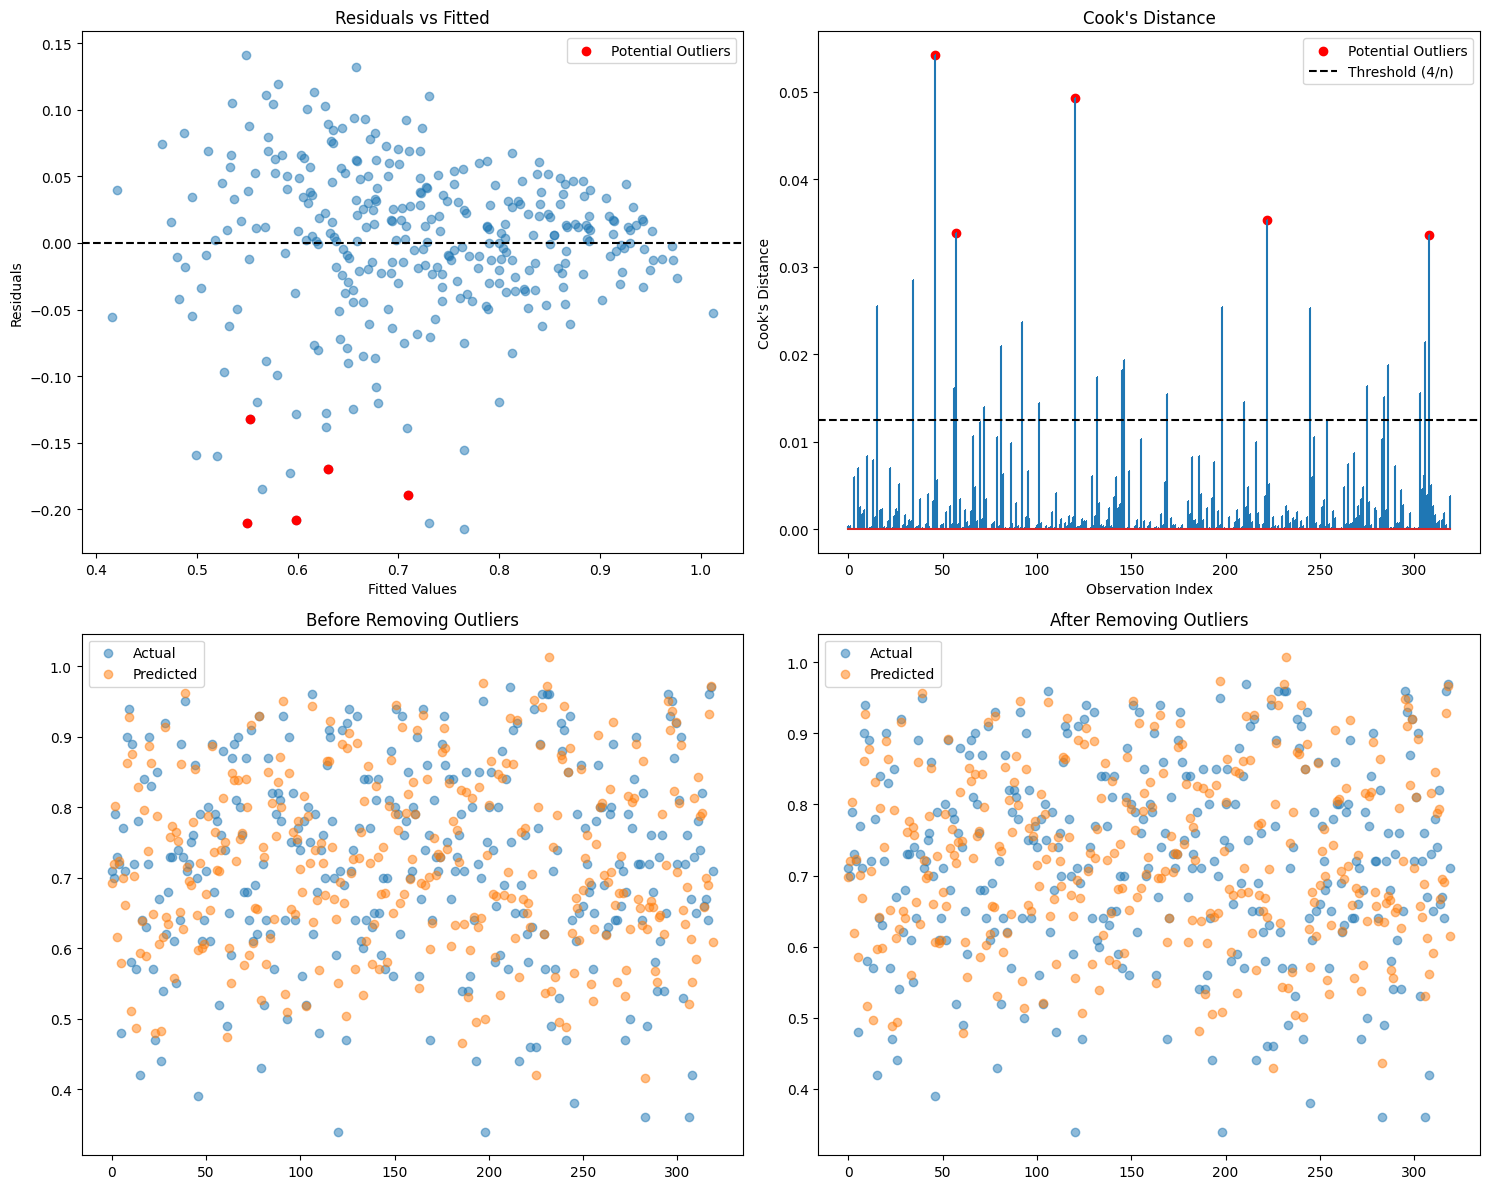


=== Outlier Analysis Summary ===

Number of potential outliers identified: 5

Most influential observations:

Observation 308:
  Original y-value: 0.420
  Predicted value: 0.552
  Standardized residual: -2.173
  Cook's distance: 0.034

Observation 57:
  Original y-value: 0.520
  Predicted value: 0.709
  Standardized residual: -3.107
  Cook's distance: 0.034

Observation 222:
  Original y-value: 0.460
  Predicted value: 0.630
  Standardized residual: -2.787
  Cook's distance: 0.035

Observation 120:
  Original y-value: 0.340
  Predicted value: 0.550
  Standardized residual: -3.447
  Cook's distance: 0.049

Observation 46:
  Original y-value: 0.390
  Predicted value: 0.598
  Standardized residual: -3.412
  Cook's distance: 0.054

R² before removing outliers: 0.807
R² after removing outliers: 0.823


(array([308,  57, 222, 120,  46]), LinearRegression())

In [76]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

def analyze_outlier_impact(X, y, n_influential=5):
    """
    Analyzes the impact of potential outliers on linear regression.
    
    Parameters:
    X : array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target variable
    n_influential : int
        Number of most influential points to highlight
    """
    # Fit initial model
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    # Calculate key metrics
    residuals = y - predictions
    std_residuals = stats.zscore(residuals)
    leverage = np.diagonal(X @ np.linalg.inv(X.T @ X) @ X.T)
    cooks_distance = _calculate_cooks_distance(X, y, predictions, leverage)
    
    # Find most influential points
    influential_idx = np.argsort(cooks_distance)[-n_influential:]
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Residuals vs Fitted
    axes[0, 0].scatter(predictions, residuals, alpha=0.5)
    axes[0, 0].scatter(predictions[influential_idx], residuals[influential_idx], 
                      color='red', label='Potential Outliers')
    axes[0, 0].axhline(y=0, color='k', linestyle='--')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].legend()
    
    # 2. Cook's Distance Plot
    axes[0, 1].stem(range(len(X)), cooks_distance, markerfmt=',')
    axes[0, 1].scatter(influential_idx, cooks_distance[influential_idx], 
                      color='red', label='Potential Outliers')
    axes[0, 1].axhline(y=4/len(X), color='k', linestyle='--', 
                      label='Threshold (4/n)')
    axes[0, 1].set_xlabel('Observation Index')
    axes[0, 1].set_ylabel("Cook's Distance")
    axes[0, 1].set_title("Cook's Distance")
    axes[0, 1].legend()
    
    # 3. Before/After Plot
    axes[1, 0].scatter(range(len(X)), y, alpha=0.5, label='Actual')
    axes[1, 0].scatter(range(len(X)), predictions, 
                      alpha=0.5, label='Predicted')
    axes[1, 0].set_title('Before Removing Outliers')
    axes[1, 0].legend()
    
    # Fit model without outliers
    mask = ~np.isin(range(len(X)), influential_idx)
    model_clean = LinearRegression()
    model_clean.fit(X[mask], y[mask])
    predictions_clean = model_clean.predict(X)
    
    axes[1, 1].scatter(range(len(X)), y, alpha=0.5, label='Actual')
    axes[1, 1].scatter(range(len(X)), predictions_clean, 
                      alpha=0.5, label='Predicted')
    axes[1, 1].set_title('After Removing Outliers')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n=== Outlier Analysis Summary ===")
    print(f"\nNumber of potential outliers identified: {len(influential_idx)}")
    print("\nMost influential observations:")
    for idx in influential_idx:
        print(f"\nObservation {idx}:")
        print(f"  Original y-value: {y[idx]:.3f}")
        print(f"  Predicted value: {predictions[idx]:.3f}")
        print(f"  Standardized residual: {std_residuals[idx]:.3f}")
        print(f"  Cook's distance: {cooks_distance[idx]:.3f}")
    
    # Compare model performance
    r2_before = model.score(X, y)
    r2_after = model_clean.score(X[mask], y[mask])
    print(f"\nR² before removing outliers: {r2_before:.3f}")
    print(f"R² after removing outliers: {r2_after:.3f}")
    
    return influential_idx, model_clean

def _calculate_cooks_distance(X, y, predictions, leverage):
    """Helper function to calculate Cook's distance"""
    n = len(y)
    mse = np.sum((y - predictions)**2) / (n - X.shape[1])
    residuals = y - predictions
    cooks_d = residuals**2 * leverage / (X.shape[1] * mse * (1 - leverage)**2)
    return cooks_d

analyze_outlier_impact(train_x, train_y)

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


=== Initial Data Diagnosis ===

Shape of data: (320, 8)

=== Checking Independence of Errors ===


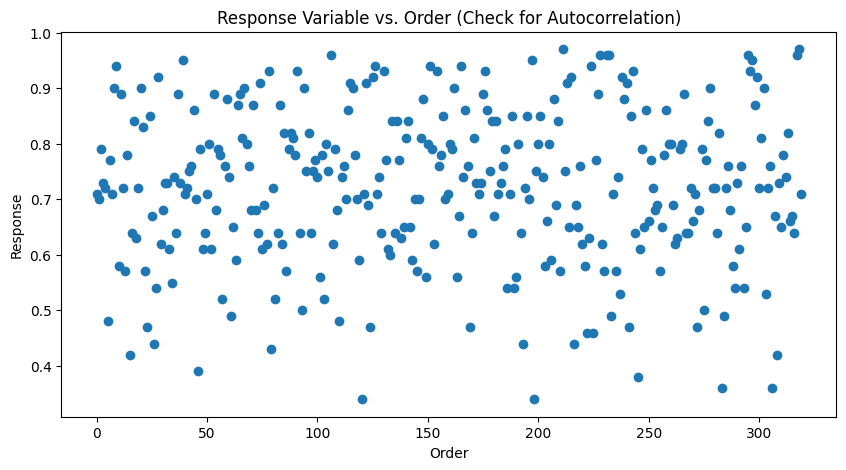


=== Checking Normality of Response ===


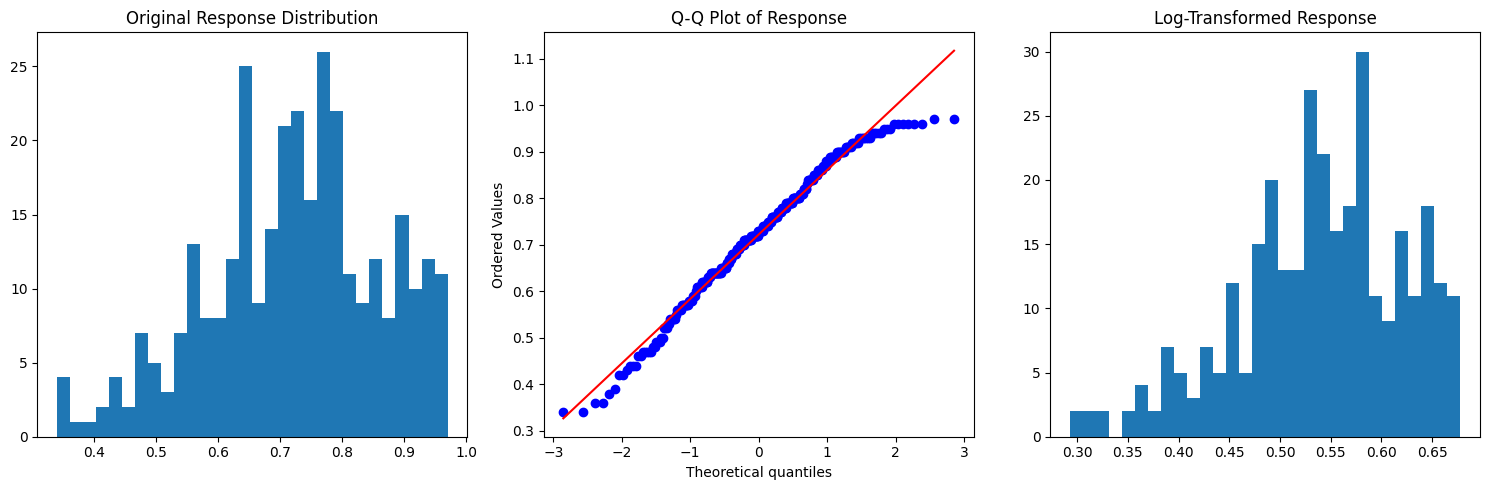

Normality test p-value: 0.0177

=== Checking Linearity and Homoscedasticity ===


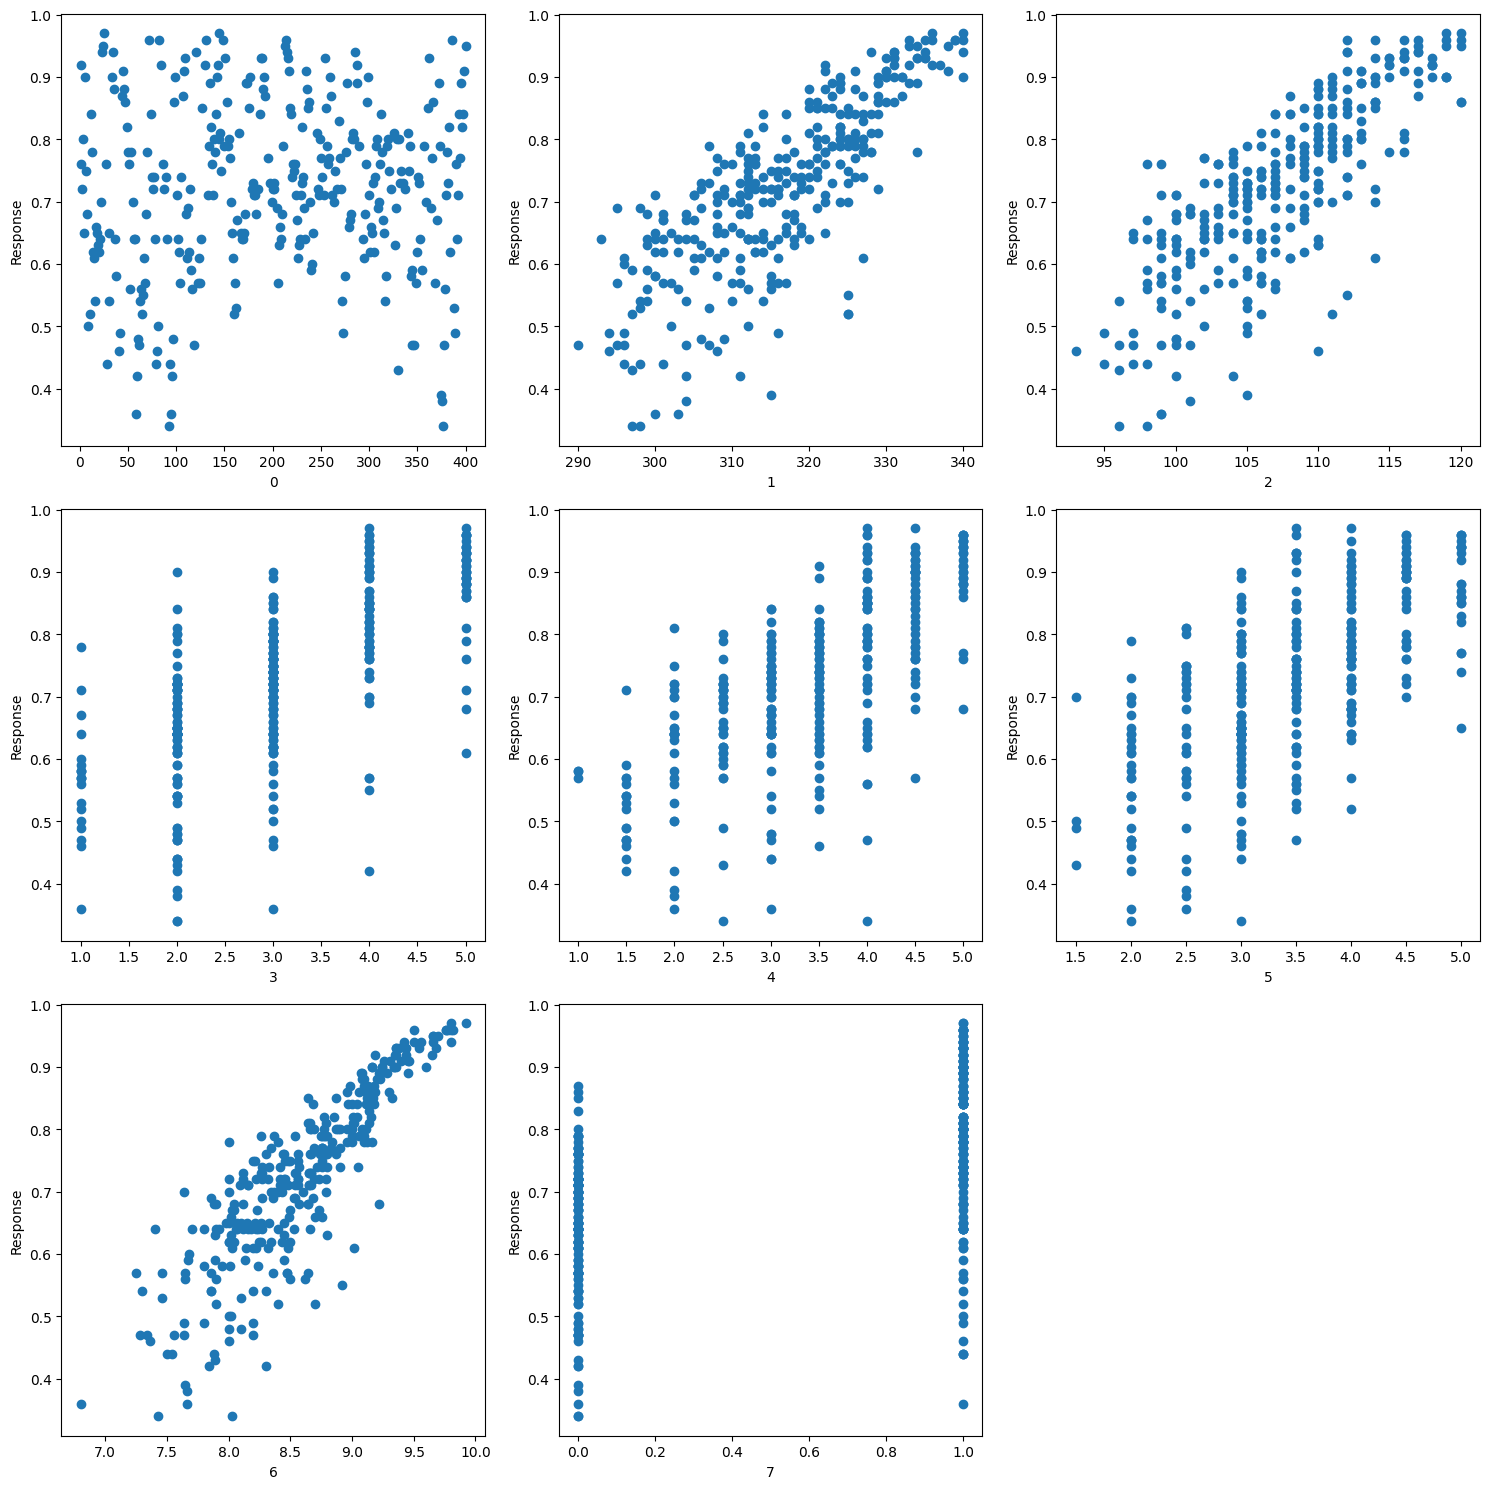


=== Handling Missing and Infinite Values ===
Missing values:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

Infinite values:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

=== Checking for Multicollinearity ===


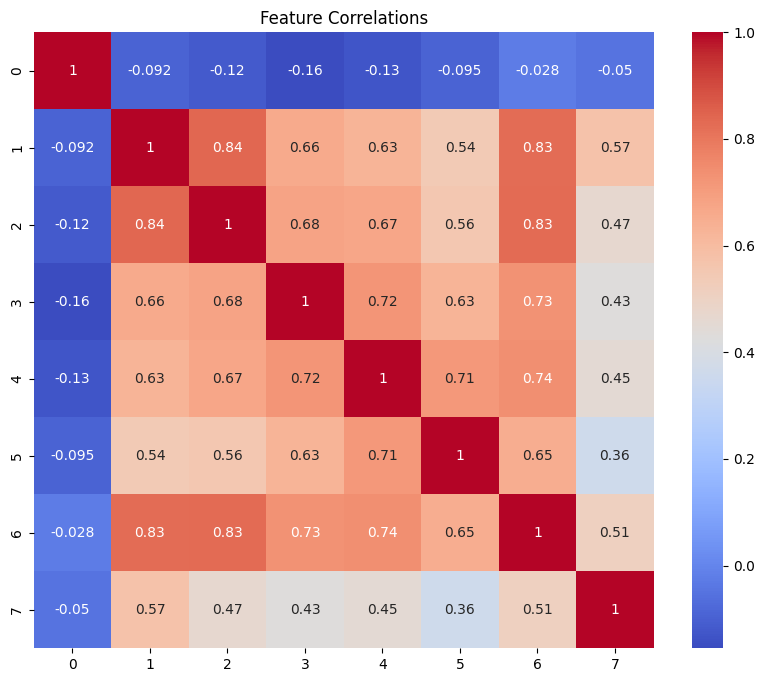


=== Handling Outliers ===
Removed 1 outliers (>3 std dev)

=== Final Data Summary ===
Training set shape: (255, 8)
Test set shape: (64, 8)

Features retained: [0, 1, 2, 3, 4, 5, 6, 7]

Transformations applied:
- Log transform of response: False
- Outliers removed: 1
- Features dropped due to multicollinearity: 0


In [74]:

def diagnose_and_prepare_data(X, y, test_size=0.2, random_state=42):
    """
    Diagnoses data issues and prepares data for linear regression while checking
    all key assumptions.
    
    Parameters:
    X : DataFrame or array-like of shape (n_samples, n_features)
        The input features
    y : array-like of shape (n_samples,)
        The target variable
    """
    print("=== Initial Data Diagnosis ===")
    
    # Convert to DataFrame if not already
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    y = np.array(y)
    
    # Basic info
    print("\nShape of data:", X.shape)
    n_samples = len(y)
    
    # 1. Check Independence of Errors
    print("\n=== Checking Independence of Errors ===")
    # Plot original order vs response to check for patterns
    plt.figure(figsize=(10, 5))
    plt.scatter(range(n_samples), y)
    plt.title('Response Variable vs. Order (Check for Autocorrelation)')
    plt.xlabel('Order')
    plt.ylabel('Response')
    plt.show()
    
    # Randomize order
    random_order = np.random.RandomState(random_state).permutation(n_samples)
    X = X.iloc[random_order]
    y = y[random_order]
    
    # 2. Check Normality of Response Variable
    print("\n=== Checking Normality of Response ===")
    plt.figure(figsize=(15, 5))
    
    # Original distribution
    plt.subplot(131)
    plt.hist(y, bins=30)
    plt.title('Original Response Distribution')
    
    # Q-Q plot
    plt.subplot(132)
    stats.probplot(y, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Response')
    
    # Log-transformed distribution
    y_log = np.log1p(y - y.min() + 1) if y.min() <= 0 else np.log1p(y)
    plt.subplot(133)
    plt.hist(y_log, bins=30)
    plt.title('Log-Transformed Response')
    
    plt.tight_layout()
    plt.show()
    
    # Test for normality
    _, p_value = stats.normaltest(y)
    print(f"Normality test p-value: {p_value:.4f}")
    
    # Decide whether to use log transform
    skewness = stats.skew(y)
    use_log = abs(skewness) > 1
    if use_log:
        print("Response is significantly skewed. Using log transform.")
        y = y_log
    
    # 3. Check Linearity and Homoscedasticity
    print("\n=== Checking Linearity and Homoscedasticity ===")
    n_cols = len(X.columns)
    n_rows = (n_cols + 2) // 3  # Arrange plots in rows of 3
    
    plt.figure(figsize=(15, 5 * n_rows))
    for idx, col in enumerate(X.columns, 1):
        plt.subplot(n_rows, 3, idx)
        plt.scatter(X[col], y)
        plt.xlabel(col)
        plt.ylabel('Response')
        
        # Add lowess smoothing to check linearity
        try:
            lowess = sm.nonparametric.lowess(y, X[col], frac=0.3)
            plt.plot(lowess[:, 0], lowess[:, 1], 'r-', linewidth=2)
        except:
            pass
    
    plt.tight_layout()
    plt.show()
    
    # 4. Handle Missing and Infinite Values
    print("\n=== Handling Missing and Infinite Values ===")
    print("Missing values:")
    print(X.isnull().sum())
    
    print("\nInfinite values:")
    print(np.isinf(X.select_dtypes(include=np.number)).sum())
    
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())  # Using median instead of mean for robustness
    
    # 5. Check for Multicollinearity
    print("\n=== Checking for Multicollinearity ===")
    correlation_matrix = X.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Feature Correlations')
    plt.show()
    
    # Identify and remove highly correlated features
    high_correlation = np.where(np.abs(correlation_matrix) > 0.9)
    features_to_drop = set()
    
    for i, j in zip(*high_correlation):
        if i != j and correlation_matrix.index[i] not in features_to_drop:
            # Keep the first feature, drop the second
            features_to_drop.add(correlation_matrix.index[j])
    
    if features_to_drop:
        print("\nRemoving highly correlated features:", features_to_drop)
        X = X.drop(columns=list(features_to_drop))
    
    # 6. Handle Outliers
    print("\n=== Handling Outliers ===")
    z_scores = np.abs(stats.zscore(X))
    outlier_mask = (z_scores < 3).all(axis=1)
    
    outliers_removed = len(X) - outlier_mask.sum()
    if outliers_removed > 0:
        print(f"Removed {outliers_removed} outliers (>3 std dev)")
        X = X[outlier_mask]
        y = y[outlier_mask]
    
    # 7. Scale Features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 8. Split Data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state
    )
    
    # Final model diagnostics
    print("\n=== Final Data Summary ===")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    print("\nFeatures retained:", X.columns.tolist())
    print("\nTransformations applied:")
    print("- Log transform of response:", use_log)
    print("- Outliers removed:", outliers_removed)
    print("- Features dropped due to multicollinearity:", len(features_to_drop))
    
    return (X_train, X_test, y_train, y_test, 
            scaler, use_log, list(features_to_drop))

# Example usage:
X_train, X_test, y_train, y_test, scaler, log_transform_used, dropped_features = diagnose_and_prepare_data(train_x, train_y)

In [75]:
linear_model = LinearRegression(learning_rate=0.001, n_iterations=1000)
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
print(linear_model.r2_score(y_test, predictions))

Loss: 0.5394917647058823
Loss: 0.516756512556918
Loss: 0.49520442522540764
Loss: 0.4747387009710568
Loss: 0.4552751318836183
Loss: 0.43674007034188683
Loss: 0.41906874484716333
Loss: 0.402203864305562
Loss: 0.3860944604943583
Loss: 0.37069492724151
Loss: 0.3559642221015195
Loss: 0.3418652022946441
Loss: 0.3283640716125667
Loss: 0.3154299190655199
Loss: 0.30303433340486846
Loss: 0.29115108042614213
Loss: 0.27975583224346967
Loss: 0.2688259396122232
Loss: 0.25834023993251687
Loss: 0.24827889484980864
Loss: 0.23862325242789426
Loss: 0.2293557297433875
Loss: 0.22045971247178517
Loss: 0.21191946863016556
Loss: 0.20372007413254745
Loss: 0.19584734821912916
Loss: 0.18828779715507124
Loss: 0.18102856487054259
Loss: 0.17405738944165788
Loss: 0.16736256450010592
Loss: 0.16093290481466305
Loss: 0.15475771541613395
Loss: 0.1488267637432984
Loss: 0.1431302543750638
Loss: 0.1376588059864499
Loss: 0.13240343022592405
Loss: 0.12735551226114372
Loss: 0.12250679278116414
Loss: 0.11784935127711751
Loss: 